In [1]:
import torch
import os
from torch import nn
from torch.utils.data import DataLoader
import pandas as pd
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
df = pd.read_csv('jennatimeserieslstm/jena_climate_2009_2016.csv')

In [4]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [5]:
df = df[5::6]
df.head()


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [6]:
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,31.12.2016 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
420527,31.12.2016 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
420533,31.12.2016 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7
420539,31.12.2016 22:10:00,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,0.35,0.68,216.7


In [7]:
df.index = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [8]:
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:10:00,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,0.87,1.36,190.6
2016-12-31 20:10:00,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,1.02,1.92,225.4
2016-12-31 21:10:00,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,0.71,1.56,158.7


In [9]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


In [10]:
temp = df['T (degC)']

<Axes: xlabel='Date Time'>

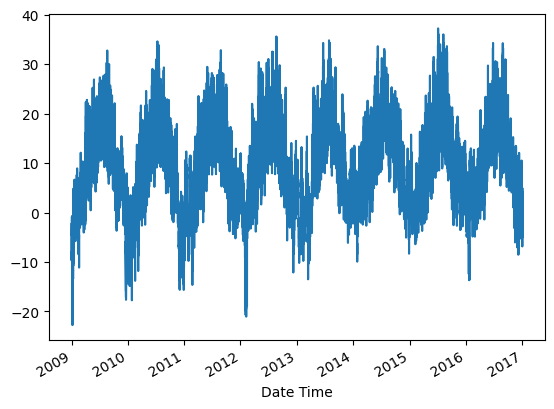

In [11]:
temp.plot()

In [12]:
def df_to_x_y(df, window_size=5):
    df_as_numpy = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_numpy) - window_size):
        row = [[a] for a in df_as_numpy[i:i+window_size]]
        X.append(row)
        label = df_as_numpy[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [13]:
WINDOW_SIZE = 5
X, y = df_to_x_y(temp, window_size=WINDOW_SIZE) 

In [14]:
X.shape, y.shape

((70086, 5, 1), (70086,))

In [15]:
X_train = X[:60000]
y_train = y[:60000]
X_val = X[60000:65000]
y_val = y[60000:65000]
X_test = X[65000:]
y_test = y[65000:]

In [16]:
X_train = torch.tensor(X_train).float()

In [17]:
type(X_train)

torch.Tensor

In [18]:
X_train

tensor([[[-8.0500],
         [-8.8800],
         [-8.8100],
         [-9.0500],
         [-9.6300]],

        [[-8.8800],
         [-8.8100],
         [-9.0500],
         [-9.6300],
         [-9.6700]],

        [[-8.8100],
         [-9.0500],
         [-9.6300],
         [-9.6700],
         [-9.1700]],

        ...,

        [[ 2.0200],
         [ 2.2700],
         [ 4.7100],
         [ 6.0700],
         [ 9.8800]],

        [[ 2.2700],
         [ 4.7100],
         [ 6.0700],
         [ 9.8800],
         [13.5300]],

        [[ 4.7100],
         [ 6.0700],
         [ 9.8800],
         [13.5300],
         [15.4300]]])

In [19]:
y_train = torch.tensor(y_train).float()

In [20]:
X_test = torch.tensor(X_test).float()
X_val = torch.tensor(X_val).float()
y_val = torch.tensor(y_val).float()
y_test = torch.tensor(y_test).float()

In [21]:
type(X_train), type(X_test), type(X_val), type(y_train), type(y_test), type(y_val)

(torch.Tensor,
 torch.Tensor,
 torch.Tensor,
 torch.Tensor,
 torch.Tensor,
 torch.Tensor)

In [22]:
train = TensorDataset(X_train, y_train)
val = TensorDataset(X_val, y_val)
test = TensorDataset(X_test, y_test)

In [23]:
train

In [24]:
train_dataloader = DataLoader(train, batch_size=32, shuffle=False)
val_dataloader = DataLoader(val, batch_size=1, shuffle=False)
test_dataloader = DataLoader(test, batch_size=1, shuffle=False)

In [25]:
#for batch_idx, (inp, labels) in enumerate(train_data_test):
    #print(f'for batch: {batch_idx}\ninputs: {inp}\nlabels: {labels}')

In [26]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

(torch.Size([60000, 5, 1]),
 torch.Size([60000]),
 torch.Size([5000, 5, 1]),
 torch.Size([5000]),
 torch.Size([5086, 5, 1]),
 torch.Size([5086]))

In [27]:
for batch_idx, (data, target) in enumerate(train):
    print(data)
    print(target)
    break

tensor([[-8.0500],
        [-8.8800],
        [-8.8100],
        [-9.0500],
        [-9.6300]])
tensor(-9.6700)


In [28]:
class Forecast(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(Forecast, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, self.hidden_size, self.num_layers, batch_first=True)
        self.linear_1 = nn.Linear(hidden_size, 8)
        self.linear_2 = nn.Linear(8, output_size)
        self.relu= nn.ReLU()
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device).float()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device).float()
        
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]
        out = self.relu(self.linear_1(out))
        out = self.linear_2(out)
        return out

In [29]:
model = Forecast(input_size=1, hidden_size=64, num_layers=1, output_size=1).to(device)

In [30]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.0001)

In [31]:
N_EPOCHS = 20
N_BATCH_SIZE = 64

In [32]:
#training loop
model.train()
running_loss = 0
total_loss = 0

for epoch in range(N_EPOCHS):
    for batch_idx, (data, target) in enumerate(tqdm(train_dataloader, desc=f'Epoch {epoch+1}', unit='batch')):
        data = data.to(device)
        target = target.to(device)

        optimizer.zero_grad()
        
        outputs = model(data)
        loss = criterion(outputs.view(-1), target)
        
        loss.backward()

        optimizer.step()

        running_loss += loss.item()
        total_loss += loss.item()

        if batch_idx == 0:
            print(f'Epoch: {epoch}, Step: {batch_idx}, Loss: {running_loss/len(train_dataloader)}')
            running_loss = 0
    
print('Loss:', total_loss/len(train_dataloader.dataset))

Epoch 1:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 0, Step: 0, Loss: 0.018418575032552082


Epoch 2:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 1, Step: 0, Loss: 54.94246842804452


Epoch 3:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 2, Step: 0, Loss: 8.665717329460383


Epoch 4:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 3, Step: 0, Loss: 5.005281706141929


Epoch 5:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 4, Step: 0, Loss: 3.0464932095617057


Epoch 6:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 5, Step: 0, Loss: 1.517550676819682


Epoch 7:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 6, Step: 0, Loss: 0.9918740940839053


Epoch 8:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 7, Step: 0, Loss: 0.8151633216996987


Epoch 9:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 8, Step: 0, Loss: 0.7402710090979934


Epoch 10:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 9, Step: 0, Loss: 0.7032978775853912


Epoch 11:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 10, Step: 0, Loss: 0.6820513562437147


Epoch 12:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 11, Step: 0, Loss: 0.6685582199191054


Epoch 13:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 12, Step: 0, Loss: 0.6596021083588401


Epoch 14:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 13, Step: 0, Loss: 0.6534462637913724


Epoch 15:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 14, Step: 0, Loss: 0.6488651972795526


Epoch 16:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 15, Step: 0, Loss: 0.6452846381341417


Epoch 17:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 16, Step: 0, Loss: 0.6424692808409532


Epoch 18:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 17, Step: 0, Loss: 0.6400891838500897


Epoch 19:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 18, Step: 0, Loss: 0.63821970551759


Epoch 20:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 19, Step: 0, Loss: 0.6365033925587932
Loss: 2.6123978547446236


In [33]:
len(train_dataloader)

1875

In [34]:
total_loss/len(train_dataloader.dataset)

2.6123978547446236

In [35]:
#validation loop
model.eval()
val_loss = 0
running_val_loss = 0
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(tqdm(val_dataloader, unit='batch')):
        data = data.to(device)
        target = target.to(device)
        
        outputs = model(data)
        loss = criterion(outputs.view(-1), target)
        
        val_loss += loss.item()
        running_val_loss += loss.item()

        if batch_idx == 0:
            print(f'Step: {batch_idx}, Loss: {running_val_loss/len(val_dataloader)}')
            running_val_loss = 0

print('Val Loss:', val_loss/len(val_dataloader.dataset))

  0%|          | 0/5000 [00:00<?, ?batch/s]

Step: 0, Loss: 0.00040655031204223633
Val Loss: 0.5258670039380705


In [36]:
#test loop
model.eval()
pred = []
real = []
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(tqdm(test_dataloader, unit='batch')):
        data = data.to(device)
        target = target.to(device)
        
        outputs = model(data)
        pred.append(outputs.item())
        real.append(target.item())

  0%|          | 0/5086 [00:00<?, ?batch/s]

In [37]:
len(pred)

5086

In [38]:
real

[13.989999771118164,
 13.460000038146973,
 12.930000305175781,
 12.430000305175781,
 12.170000076293945,
 11.550000190734863,
 11.59000015258789,
 14.220000267028809,
 17.8700008392334,
 19.1200008392334,
 20.75,
 21.56999969482422,
 21.43000030517578,
 22.329999923706055,
 24.030000686645508,
 22.889999389648438,
 22.200000762939453,
 21.760000228881836,
 20.549999237060547,
 19.309999465942383,
 18.43000030517578,
 18.06999969482422,
 17.040000915527344,
 16.8700008392334,
 16.420000076293945,
 16.18000030517578,
 16.139999389648438,
 16.110000610351562,
 16.1299991607666,
 15.970000267028809,
 16.290000915527344,
 16.8700008392334,
 17.639999389648438,
 18.729999542236328,
 18.850000381469727,
 18.68000030517578,
 19.450000762939453,
 20.15999984741211,
 19.469999313354492,
 17.5,
 17.139999389648438,
 17.8799991607666,
 17.719999313354492,
 17.459999084472656,
 17.5,
 16.979999542236328,
 15.699999809265137,
 14.979999542236328,
 14.09000015258789,
 13.359999656677246,
 12.90999984

In [39]:
predictions_df = pd.DataFrame(pred, columns=['Predictions'])
real_values_df = pd.DataFrame(real, columns=['Real Values'])

results_df = pd.concat([predictions_df, real_values_df], axis=1)

print(results_df)

      Predictions  Real Values
0       13.880509        13.99
1       12.737020        13.46
2       12.367966        12.93
3       11.983541        12.43
4       11.566823        12.17
...           ...          ...
5081    -1.087812        -0.98
5082    -1.484294        -1.40
5083    -1.609675        -2.75
5084    -3.049457        -2.89
5085    -3.034430        -3.93

[5086 rows x 2 columns]


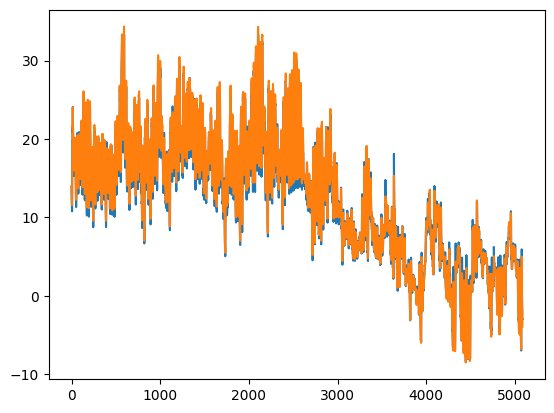

In [40]:
plt.plot(results_df['Predictions'], label='Predictions')
plt.plot(results_df['Real Values'], label='Real Values')

In [41]:
r2_score = r2_score(results_df['Real Values'], results_df['Predictions'])
print('The R2 score is:', r2_score)

The R2 score is: 0.9876925567489708


In [42]:
from sklearn.metrics import mean_squared_error as mse

def plot_predictions1(model, dataloader, start=0, end=100):
  model.eval()
  pred = []
  real = []
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(tqdm(dataloader, unit='batch')):
          data = data.to(device)
          target = target.to(device)
          
          outputs = model(data)
          pred.append(outputs.item())
          real.append(target.item())
  df = pd.DataFrame(data={'Predictions':pred, 'Actuals':real})
  plt.plot(df['Predictions'][start:end])
  plt.plot(df['Actuals'][start:end])
  return df, mse(real, pred)

  0%|          | 0/5086 [00:00<?, ?batch/s]

(      Predictions  Actuals
 0       13.880509    13.99
 1       12.737020    13.46
 2       12.367966    12.93
 3       11.983541    12.43
 4       11.566823    12.17
 ...           ...      ...
 5081    -1.087812    -0.98
 5082    -1.484294    -1.40
 5083    -1.609675    -2.75
 5084    -3.049457    -2.89
 5085    -3.034430    -3.93
 
 [5086 rows x 2 columns],
 0.856847263266785)

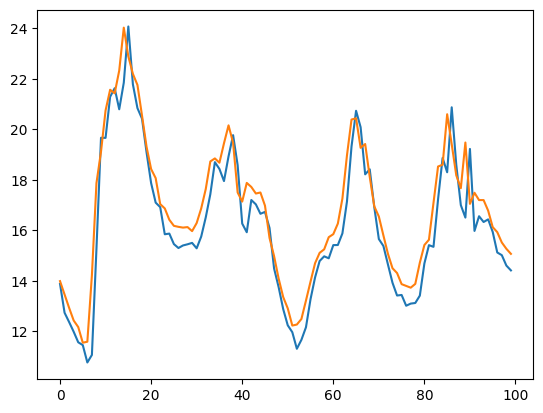

In [43]:
plot_predictions1(model, test_dataloader)

In [44]:
class ForecastV2(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(ForecastV2, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.conv1d = nn.Conv1d(input_size, self.hidden_size, kernel_size=2, stride=1, padding=1)
        self.flatten = nn.Flatten()
        self.linear_1 = nn.Linear(hidden_size*6, 8)
        self.linear_2 = nn.Linear(8, output_size)
        self.relu= nn.ReLU()
        
    def forward(self, x):
        out = self.conv1d(x)
        out = self.flatten(out)
        out = self.relu(self.linear_1(out))
        out = self.linear_2(out)
        return out

In [45]:
model1 = ForecastV2(input_size=1, hidden_size=64, num_layers=1, output_size=1).to(device)

In [46]:
for data, target in train_dataloader:
    print(data.shape)
    break

torch.Size([32, 5, 1])


In [47]:
criterion2 = nn.MSELoss()
optimizer2 = torch.optim.Adam(params=model1.parameters(), lr=0.0001)

In [48]:
#training loop for model1
model1.train()
running_loss = 0
total_loss = 0

for epoch in range(N_EPOCHS):
    for batch_idx, (data, target) in enumerate(tqdm(train_dataloader, desc=f'Epoch {epoch+1}', unit='batch')):
        data = data.to(device)
        target = target.to(device)

        optimizer2.zero_grad()
        
        outputs = model1(data.view(-1, 1, 5))
        loss = criterion2(outputs.view(-1), target)
        
        loss.backward()

        optimizer2.step()

        running_loss += loss.item()
        total_loss += loss.item()

        if batch_idx == 0:
            print(f'Epoch: {epoch}, Step: {batch_idx}, Loss: {running_loss/len(train_dataloader)}')
            running_loss = 0
    
print('Loss:', total_loss/len(train_dataloader.dataset))

Epoch 1:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 0, Step: 0, Loss: 0.021458003743489582


Epoch 2:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 1, Step: 0, Loss: 3.2935056579505404


Epoch 3:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 2, Step: 0, Loss: 0.8430828733235598


Epoch 4:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 3, Step: 0, Loss: 0.7559016332556804


Epoch 5:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 4, Step: 0, Loss: 0.7042841759800911


Epoch 6:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 5, Step: 0, Loss: 0.6798864199327925


Epoch 7:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 6, Step: 0, Loss: 0.6708839852253596


Epoch 8:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 7, Step: 0, Loss: 0.6663846948881944


Epoch 9:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 8, Step: 0, Loss: 0.6640556833614906


Epoch 10:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 9, Step: 0, Loss: 0.6623587975099683


Epoch 11:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 10, Step: 0, Loss: 0.6610405001337329


Epoch 12:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 11, Step: 0, Loss: 0.6602464632076521


Epoch 13:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 12, Step: 0, Loss: 0.659583716365695


Epoch 14:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 13, Step: 0, Loss: 0.6591760321050882


Epoch 15:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 14, Step: 0, Loss: 0.6590407119673988


Epoch 16:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 15, Step: 0, Loss: 0.6583627841134866


Epoch 17:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 16, Step: 0, Loss: 0.6582470041140914


Epoch 18:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 17, Step: 0, Loss: 0.6581273767665029


Epoch 19:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 18, Step: 0, Loss: 0.6578719870289167


Epoch 20:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 19, Step: 0, Loss: 0.657687025932471
Loss: 0.506512058341767


In [49]:
#validation loop
model1.eval()
val_loss = 0
running_val_loss = 0
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(tqdm(val_dataloader, unit='batch')):
        data = data.to(device)
        target = target.to(device)
        
        outputs = model1(data.view(-1, 1, 5))
        loss = criterion2(outputs.view(-1), target)
        
        val_loss += loss.item()
        running_val_loss += loss.item()

        if batch_idx == 0:
            print(f'Step: {batch_idx}, Loss: {running_val_loss/len(val_dataloader)}')
            running_val_loss = 0

print('Val Loss:', val_loss/len(val_dataloader.dataset))

  0%|          | 0/5000 [00:00<?, ?batch/s]

Step: 0, Loss: 0.00036186621189117433
Val Loss: 0.5686376781740824


In [50]:
class ForecastV3(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(ForecastV3, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, self.hidden_size, self.num_layers, batch_first=True)
        self.linear_1 = nn.Linear(hidden_size, 8)
        self.linear_2 = nn.Linear(8, output_size)
        self.relu= nn.ReLU()
        
    def forward(self, x):
        _, h_n = self.gru(x)
        x = h_n[-1, :, :]  # This selects the last layer's hidden state for all batches
        x = self.linear_1(x)
        x = self.relu(x)
        x = self.linear_2(x)
        return x

In [51]:
model2 = ForecastV3(input_size=1, hidden_size=64, num_layers=1, output_size=1).to(device)

In [52]:
criterion3 = nn.MSELoss()
optimizer3 = torch.optim.Adam(params=model2.parameters(), lr=0.0001)

In [53]:
#training loop for model2
model2.train()
running_loss = 0
total_loss = 0

for epoch in range(N_EPOCHS):
    for batch_idx, (data, target) in enumerate(tqdm(train_dataloader, desc=f'Epoch {epoch+1}', unit='batch')):
        data = data.to(device)
        target = target.to(device)

        optimizer3.zero_grad()
        
        outputs = model2(data)
        loss = criterion3(outputs.view(-1), target)
        
        loss.backward()

        optimizer3.step()

        running_loss += loss.item()
        total_loss += loss.item()

        if batch_idx == 0:
            print(f'Epoch: {epoch}, Step: {batch_idx}, Loss: {running_loss/len(train_dataloader)}')
            running_loss = 0
    
print('Loss:', total_loss/len(train_dataloader.dataset))

Epoch 1:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 0, Step: 0, Loss: 0.01811962890625


Epoch 2:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 1, Step: 0, Loss: 75.22822117205263


Epoch 3:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 2, Step: 0, Loss: 12.302507292446494


Epoch 4:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 3, Step: 0, Loss: 3.539600054644545


Epoch 5:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 4, Step: 0, Loss: 1.67546624430269


Epoch 6:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 5, Step: 0, Loss: 1.088176093623042


Epoch 7:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 6, Step: 0, Loss: 0.8591066266099612


Epoch 8:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 7, Step: 0, Loss: 0.7548072195445498


Epoch 9:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 8, Step: 0, Loss: 0.7029994393505156


Epoch 10:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 9, Step: 0, Loss: 0.6752526352368295


Epoch 11:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 10, Step: 0, Loss: 0.6597327782029907


Epoch 12:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 11, Step: 0, Loss: 0.6507860055088996


Epoch 13:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 12, Step: 0, Loss: 0.6453311275700728


Epoch 14:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 13, Step: 0, Loss: 0.6417337454674145


Epoch 15:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 14, Step: 0, Loss: 0.6391914719161887


Epoch 16:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 15, Step: 0, Loss: 0.6373005502286057


Epoch 17:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 16, Step: 0, Loss: 0.6358090889724592


Epoch 18:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 17, Step: 0, Loss: 0.6346256206919749


Epoch 19:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 18, Step: 0, Loss: 0.6336480810721715


Epoch 20:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 19, Step: 0, Loss: 0.632786106069386
Loss: 3.2464721116768196


In [54]:
#validation loop for model2
model2.eval()
val_loss = 0
running_val_loss = 0
with torch.no_grad():
    for batch_idx, (data, target) in enumerate(tqdm(val_dataloader, unit='batch')):
        data = data.to(device)
        target = target.to(device)
        
        outputs = model2(data)
        loss = criterion3(outputs.view(-1), target)
        
        val_loss += loss.item()
        running_val_loss += loss.item()

        if batch_idx == 0:
            print(f'Step: {batch_idx}, Loss: {running_val_loss/len(val_dataloader)}')
            running_val_loss = 0

print('Val Loss:', val_loss/len(val_dataloader.dataset))

  0%|          | 0/5000 [00:00<?, ?batch/s]

Step: 0, Loss: 0.0003664721727371216
Val Loss: 0.5234182065101888


In [55]:
temp

Date Time
2009-01-01 01:00:00   -8.05
2009-01-01 02:00:00   -8.88
2009-01-01 03:00:00   -8.81
2009-01-01 04:00:00   -9.05
2009-01-01 05:00:00   -9.63
                       ... 
2016-12-31 19:10:00   -0.98
2016-12-31 20:10:00   -1.40
2016-12-31 21:10:00   -2.75
2016-12-31 22:10:00   -2.89
2016-12-31 23:10:00   -3.93
Name: T (degC), Length: 70091, dtype: float64

In [56]:
temp_df = pd.DataFrame({'Temperature': temp})
temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)
temp_df

,Temperature,Seconds
Date Time,,
2009-01-01 01:00:00,-8.05,1.230772e+09
2009-01-01 02:00:00,-8.88,1.230775e+09
2009-01-01 03:00:00,-8.81,1.230779e+09
2009-01-01 04:00:00,-9.05,1.230782e+09
2009-01-01 05:00:00,-9.63,1.230786e+09
...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09
2016-12-31 20:10:00,-1.40,1.483215e+09
2016-12-31 21:10:00,-2.75,1.483219e+09


In [57]:
day = 24*24*60
year = (365.2425)*day
temp_df['Day sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / day))

In [58]:
temp_df

,Temperature,Seconds,Day sin
Date Time,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,-0.608761
2009-01-01 02:00:00,-8.88,1.230775e+09,-0.965926
2009-01-01 03:00:00,-8.81,1.230779e+09,-0.923880
2009-01-01 04:00:00,-9.05,1.230782e+09,-0.500000
2009-01-01 05:00:00,-9.63,1.230786e+09,0.130526
...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.021815
2016-12-31 20:10:00,-1.40,1.483215e+09,0.591310
2016-12-31 21:10:00,-2.75,1.483219e+09,0.960050


<Axes: xlabel='Date Time'>

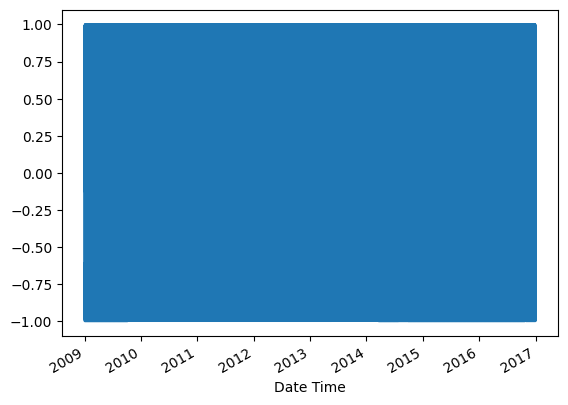

In [59]:
temp_df['Day sin'].plot()

In [60]:
temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))
temp_df['Year sin'] = np.sin(temp_df['Seconds'] * (2 * np.pi / year))
temp_df['Year cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / year))

In [61]:
temp_df

,Temperature,Seconds,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,-8.05,1.230772e+09,-0.608761,-0.793353,-0.025121,-0.999684
2009-01-01 02:00:00,-8.88,1.230775e+09,-0.965926,-0.258819,-0.026912,-0.999638
2009-01-01 03:00:00,-8.81,1.230779e+09,-0.923880,0.382683,-0.028703,-0.999588
2009-01-01 04:00:00,-9.05,1.230782e+09,-0.500000,0.866025,-0.030494,-0.999535
2009-01-01 05:00:00,-9.63,1.230786e+09,0.130526,0.991445,-0.032285,-0.999479
...,...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,1.483211e+09,-0.021815,0.999762,-0.017250,-0.999851
2016-12-31 20:10:00,-1.40,1.483215e+09,0.591310,0.806445,-0.019041,-0.999819
2016-12-31 21:10:00,-2.75,1.483219e+09,0.960050,0.279829,-0.020833,-0.999783


In [62]:
temp_df.drop(['Seconds'], axis=1, inplace=True)

In [63]:
temp_df

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,-0.608761,-0.793353,-0.025121,-0.999684
2009-01-01 02:00:00,-8.88,-0.965926,-0.258819,-0.026912,-0.999638
2009-01-01 03:00:00,-8.81,-0.923880,0.382683,-0.028703,-0.999588
2009-01-01 04:00:00,-9.05,-0.500000,0.866025,-0.030494,-0.999535
2009-01-01 05:00:00,-9.63,0.130526,0.991445,-0.032285,-0.999479
...,...,...,...,...,...
2016-12-31 19:10:00,-0.98,-0.021815,0.999762,-0.017250,-0.999851
2016-12-31 20:10:00,-1.40,0.591310,0.806445,-0.019041,-0.999819
2016-12-31 21:10:00,-2.75,0.960050,0.279829,-0.020833,-0.999783


In [64]:
#temp_df['Seconds'] = temp_df.index.map(pd.Timestamp.timestamp)


In [65]:
temp_df.head()

,Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,
2009-01-01 01:00:00,-8.05,-0.608761,-0.793353,-0.025121,-0.999684
2009-01-01 02:00:00,-8.88,-0.965926,-0.258819,-0.026912,-0.999638
2009-01-01 03:00:00,-8.81,-0.923880,0.382683,-0.028703,-0.999588
2009-01-01 04:00:00,-9.05,-0.500000,0.866025,-0.030494,-0.999535
2009-01-01 05:00:00,-9.63,0.130526,0.991445,-0.032285,-0.999479


In [66]:
#temp_df['Day cos'] = np.cos(temp_df['Seconds'] * (2 * np.pi / day))


In [67]:
#Taking multiple variables instead of one for the time step:
def df_to_x_y2(df, window_size=6):
    df_as_numpy = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_numpy) - window_size):
        row = [r for r in df_as_numpy[i:i+window_size]]
        X.append(row)
        label = df_as_numpy[i+window_size][0]
        y.append(label)
    return np.array(X), np.array(y)

In [68]:
X2, y2 = df_to_x_y2(temp_df)
X2.shape, y2.shape

((70085, 6, 5), (70085,))

In [69]:
X_train2 = X2[:60000]
y_train2 = y2[:60000]
X_val2 = X2[60000:65000]
y_val2 = y2[60000:65000]
X_test2 = X2[65000:]
y_test2 = y2[65000:]

In [70]:
X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape

((60000, 6, 5), (60000,), (5000, 6, 5), (5000,), (5085, 6, 5), (5085,))

In [71]:
X_train2 = torch.tensor(X_train2).float()
y_train2 = torch.tensor(y_train2).float()
X_val2 = torch.tensor(X_val2).float()
y_val2 = torch.tensor(y_val2).float()
X_test2 = torch.tensor(X_test2).float()
y_test2 = torch.tensor(y_test2).float()

In [72]:
X_train2_mean = torch.mean(X_train2[:, :, 0])
X_train2_std = torch.std(X_train2[:, :, 0])


In [73]:
def preprocess(X):
    X[:, :, 0] = (X[:, :, 0] - X_train2_mean) / X_train2_std
    return X

In [74]:
preprocess(X_train2)
preprocess(X_val2)
preprocess(X_test2)

tensor([[[ 1.0401e+00,  1.3053e-01, -9.9144e-01,  1.9400e-01,  9.8100e-01],
         [ 9.9073e-01, -5.0000e-01, -8.6603e-01,  1.9576e-01,  9.8065e-01],
         [ 8.4969e-01, -9.2388e-01, -3.8268e-01,  1.9751e-01,  9.8030e-01],
         [ 7.5566e-01, -9.6593e-01,  2.5882e-01,  1.9927e-01,  9.7994e-01],
         [ 6.6634e-01, -6.0876e-01,  7.9335e-01,  2.0103e-01,  9.7959e-01],
         [ 5.3705e-01, -1.7912e-11,  1.0000e+00,  2.0278e-01,  9.7922e-01]],

        [[ 9.9073e-01, -5.0000e-01, -8.6603e-01,  1.9576e-01,  9.8065e-01],
         [ 8.4969e-01, -9.2388e-01, -3.8268e-01,  1.9751e-01,  9.8030e-01],
         [ 7.5566e-01, -9.6593e-01,  2.5882e-01,  1.9927e-01,  9.7994e-01],
         [ 6.6634e-01, -6.0876e-01,  7.9335e-01,  2.0103e-01,  9.7959e-01],
         [ 5.3705e-01, -1.7912e-11,  1.0000e+00,  2.0278e-01,  9.7922e-01],
         [ 4.7476e-01,  6.0876e-01,  7.9335e-01,  2.0454e-01,  9.7886e-01]],

        [[ 8.4969e-01, -9.2388e-01, -3.8268e-01,  1.9751e-01,  9.8030e-01],
        

In [75]:
train2 = TensorDataset(X_train2, y_train2)
val2 = TensorDataset(X_val2, y_val2)
test2 = TensorDataset(X_test2, y_test2)

In [76]:
train_dataloader2 = DataLoader(train2, batch_size=32, shuffle=False)
val_dataloader2 = DataLoader(val2, batch_size=1, shuffle=False)
test_dataloader2 = DataLoader(test2, batch_size=1, shuffle=False)

In [77]:
X_test2.shape

torch.Size([5085, 6, 5])

In [78]:
model4 = Forecast(input_size=5, hidden_size=64, num_layers=1, output_size=1).to(device)

In [79]:
for batch_idx, (data, target) in enumerate(tqdm(train_dataloader2, desc=f'Epoch {epoch+1}', unit='batch')):
        data = data.to(device)
        target = target.to(device)
print(data.shape)

Epoch 20:   0%|          | 0/1875 [00:00<?, ?batch/s]

torch.Size([32, 6, 5])


In [80]:
'''class Forecast(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(Forecast, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, self.hidden_size, self.num_layers, batch_first=True)
        self.linear_1 = nn.Linear(hidden_size, 8)
        self.linear_2 = nn.Linear(8, output_size)
        self.relu= nn.ReLU()
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device).float()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device).float()
        
        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -1, :]
        out = self.relu(self.linear_1(out))
        out = self.linear_2(out)
        return out'''

'class Forecast(nn.Module):\n    def __init__(self, input_size, hidden_size, num_layers, output_size):\n        super(Forecast, self).__init__()\n        self.hidden_size = hidden_size\n        self.num_layers = num_layers\n        self.lstm = nn.LSTM(input_size, self.hidden_size, self.num_layers, batch_first=True)\n        self.linear_1 = nn.Linear(hidden_size, 8)\n        self.linear_2 = nn.Linear(8, output_size)\n        self.relu= nn.ReLU()\n        \n    def forward(self, x):\n        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device).float()\n        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device).float()\n        \n        out, _ = self.lstm(x, (h0, c0))\n        out = out[:, -1, :]\n        out = self.relu(self.linear_1(out))\n        out = self.linear_2(out)\n        return out'

In [81]:
criterion4 = nn.MSELoss()
optimizer4 = torch.optim.Adam(params=model4.parameters(), lr=0.0001)

In [82]:
#training loop for model4
model4.train()
running_loss = 0
total_loss = 0

for epoch in range(N_EPOCHS):
    for batch_idx, (data, target) in enumerate(tqdm(train_dataloader2, desc=f'Epoch {epoch+1}', unit='batch')):
        data = data.to(device)
        target = target.to(device)

        optimizer4.zero_grad()
        
        outputs = model4(data)
        loss = criterion4(outputs.view(-1), target)
        
        loss.backward()

        optimizer4.step()

        running_loss += loss.item()
        total_loss += loss.item()

        if batch_idx == 0:
            print(f'Epoch: {epoch}, Step: {batch_idx}, Loss: {running_loss/len(train_dataloader2)}')
            running_loss = 0
    
print('Loss:', total_loss/len(train_dataloader2.dataset))

Epoch 1:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 0, Step: 0, Loss: 0.0138441650390625


Epoch 2:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 1, Step: 0, Loss: 163.59389602399668


Epoch 3:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 2, Step: 0, Loss: 159.06303252141873


Epoch 4:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 3, Step: 0, Loss: 154.79160470589795


Epoch 5:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 4, Step: 0, Loss: 151.61682780255475


Epoch 6:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 5, Step: 0, Loss: 148.5922840756496


Epoch 7:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 6, Step: 0, Loss: 145.64873402072985


Epoch 8:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 7, Step: 0, Loss: 142.76985858896177


Epoch 9:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 8, Step: 0, Loss: 139.94898551361163


Epoch 10:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 9, Step: 0, Loss: 137.1861844262918


Epoch 11:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 10, Step: 0, Loss: 134.4759256245653


Epoch 12:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 11, Step: 0, Loss: 131.817484077696


Epoch 13:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 12, Step: 0, Loss: 129.20741614317694


Epoch 14:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 13, Step: 0, Loss: 126.64441404994527


Epoch 15:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 14, Step: 0, Loss: 124.12676343660156


Epoch 16:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 15, Step: 0, Loss: 121.6529276514848


Epoch 17:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 16, Step: 0, Loss: 119.2226487911274


Epoch 18:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 17, Step: 0, Loss: 116.83362103543878


Epoch 19:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 18, Step: 0, Loss: 114.48510806171596


Epoch 20:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 19, Step: 0, Loss: 112.17601324450821
Loss: 83.86783708556473


  0%|          | 0/5085 [00:00<?, ?batch/s]

(      Predictions  Actuals
 0        2.738438    13.46
 1        2.738438    12.93
 2        2.738438    12.43
 3        2.738438    12.17
 4        2.738438    11.55
 ...           ...      ...
 5080     1.458862    -0.98
 5081     0.151845    -1.40
 5082    -0.756858    -2.75
 5083    -1.513993    -2.89
 5084    -2.074824    -3.93
 
 [5085 rows x 2 columns],
 165.84082160739106)

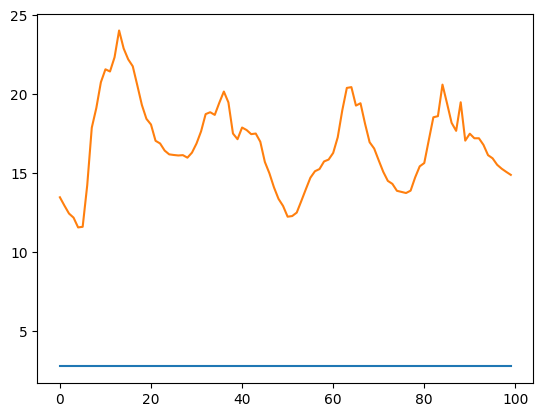

In [83]:
plot_predictions1(model4, test_dataloader2)

In [84]:
p_temp_df = pd.concat([df['p (mbar)'], temp_df], axis=1)
p_temp_df.head()

,p (mbar),Temperature,Day sin,Day cos,Year sin,Year cos
Date Time,,,,,,
2009-01-01 01:00:00,996.50,-8.05,-0.608761,-0.793353,-0.025121,-0.999684
2009-01-01 02:00:00,996.62,-8.88,-0.965926,-0.258819,-0.026912,-0.999638
2009-01-01 03:00:00,996.84,-8.81,-0.923880,0.382683,-0.028703,-0.999588
2009-01-01 04:00:00,996.99,-9.05,-0.500000,0.866025,-0.030494,-0.999535
2009-01-01 05:00:00,997.46,-9.63,0.130526,0.991445,-0.032285,-0.999479


In [85]:
#Taking multiple variables instead of one for the time step:
def df_to_x_y3(df, window_size=7):
    df_as_numpy = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_numpy) - window_size):
        row = [r for r in df_as_numpy[i:i+window_size]]
        X.append(row)
        label = [df_as_numpy[i+window_size][0], df_as_numpy[i+window_size][1]]
        y.append(label)
    return np.array(X), np.array(y)

In [86]:
X3, y3 = df_to_x_y3(p_temp_df)

In [87]:
X3.shape, y3.shape

((70084, 7, 6), (70084, 2))

In [88]:
X3_train = X3[:60000]
y3_train = y3[:60000]
X3_val = X3[60000:65000]
y3_val = y3[60000:65000]
X3_test = X3[65000:]
y3_test = y3[65000:]

In [89]:
X3_train = torch.tensor(X3_train).float()
y3_train = torch.tensor(y3_train).float()
X3_val = torch.tensor(X3_val).float()
y3_val = torch.tensor(y3_val).float()
X3_test = torch.tensor(X3_test).float()
y3_test = torch.tensor(y3_test).float()

In [90]:
p_training_mean3 = torch.mean(X3_train[:, :, 0])
p_training_std3 = torch.std(X3_train[:, :, 0])
temp_training_mean3 = torch.mean(X3_train[:, :, 1])
temp_training_std3 = torch.std(X3_train[:, :, 1])
def preprocess2(X):
    X[:, :, 0] = (X[:, :, 0] - p_training_mean3) / p_training_std3
    X[:, :, 1] = (X[:, :, 1] - temp_training_mean3) / temp_training_std3
    return X

In [91]:
preprocess2(X3_train)

tensor([[[ 9.1274e-01, -2.0535e+00, -6.0876e-01, -7.9335e-01, -2.5121e-02,
          -9.9968e-01],
         [ 9.2729e-01, -2.1510e+00, -9.6593e-01, -2.5882e-01, -2.6912e-02,
          -9.9964e-01],
         [ 9.5398e-01, -2.1428e+00, -9.2388e-01,  3.8268e-01, -2.8703e-02,
          -9.9959e-01],
         ...,
         [ 1.0292e+00, -2.2392e+00,  1.3053e-01,  9.9144e-01, -3.2285e-02,
          -9.9948e-01],
         [ 1.0595e+00, -2.2439e+00,  7.0711e-01,  7.0711e-01, -3.4076e-02,
          -9.9942e-01],
         [ 1.1347e+00, -2.1851e+00,  9.9144e-01,  1.3053e-01, -3.5867e-02,
          -9.9936e-01]],

        [[ 9.2729e-01, -2.1510e+00, -9.6593e-01, -2.5882e-01, -2.6912e-02,
          -9.9964e-01],
         [ 9.5398e-01, -2.1428e+00, -9.2388e-01,  3.8268e-01, -2.8703e-02,
          -9.9959e-01],
         [ 9.7216e-01, -2.1710e+00, -5.0000e-01,  8.6603e-01, -3.0494e-02,
          -9.9953e-01],
         ...,
         [ 1.0595e+00, -2.2439e+00,  7.0711e-01,  7.0711e-01, -3.4076e-02,
    

In [92]:
def preprocess2_y(y):
    y[:, 0] = (y[:, 0] - p_training_mean3) / p_training_std3
    y[:, 1] = (y[:, 1] - temp_training_mean3) / temp_training_std3
    return y

In [93]:
preprocess2_y(y3_train)

tensor([[ 1.2365, -2.0593],
        [ 1.2996, -2.0076],
        [ 1.3699, -1.9347],
        ...,
        [ 0.5950,  0.7192],
        [ 0.6047,  0.5406],
        [ 0.6193,  0.4994]])

In [94]:
preprocess2_y(y3_val)
preprocess2_y(y3_test)
preprocess2(X3_val)
preprocess2(X3_test)

tensor([[[-1.0735e+00,  1.0401e+00,  1.3053e-01, -9.9144e-01,  1.9400e-01,
           9.8100e-01],
         [-1.0081e+00,  9.9073e-01, -5.0000e-01, -8.6603e-01,  1.9576e-01,
           9.8065e-01],
         [-9.5107e-01,  8.4968e-01, -9.2388e-01, -3.8268e-01,  1.9751e-01,
           9.8030e-01],
         ...,
         [-8.8073e-01,  6.6633e-01, -6.0876e-01,  7.9335e-01,  2.0103e-01,
           9.7959e-01],
         [-8.2980e-01,  5.3704e-01, -1.7912e-11,  1.0000e+00,  2.0278e-01,
           9.7922e-01],
         [-8.0192e-01,  4.7474e-01,  6.0876e-01,  7.9335e-01,  2.0454e-01,
           9.7886e-01]],

        [[-1.0081e+00,  9.9073e-01, -5.0000e-01, -8.6603e-01,  1.9576e-01,
           9.8065e-01],
         [-9.5107e-01,  8.4968e-01, -9.2388e-01, -3.8268e-01,  1.9751e-01,
           9.8030e-01],
         [-9.1469e-01,  7.5566e-01, -9.6593e-01,  2.5882e-01,  1.9927e-01,
           9.7994e-01],
         ...,
         [-8.2980e-01,  5.3704e-01, -1.7912e-11,  1.0000e+00,  2.0278e-01,
    

In [95]:
train3 = TensorDataset(X3_train, y3_train)
val3 = TensorDataset(X3_val, y3_val)
test3 = TensorDataset(X3_test, y3_test)

In [96]:
train_dataloader3 = DataLoader(train3, batch_size=32, shuffle=False)
val_dataloader3 = DataLoader(val3, batch_size=1, shuffle=False)
test_dataloader3 = DataLoader(test3, batch_size=1, shuffle=False)

In [97]:
for data, target in train_dataloader3:
    print(data.shape)
    break

torch.Size([32, 7, 6])


In [104]:
model_5 = Forecast(input_size=6, hidden_size=64, num_layers=1, output_size=2).to(device)
criterion5 = nn.MSELoss()
optimizer5 = torch.optim.Adam(params=model_5.parameters(), lr=0.0001)

In [146]:
model_5.train()
running_loss = 0
total_loss = 0
for epoch in range(N_EPOCHS):
    for batch_idx, (data, target) in enumerate(tqdm(train_dataloader3, unit='batch', desc=f'Epoch {epoch+1}')):
        data = data.to(device)
        target = target.to(device)

        optimizer5.zero_grad()
        outputs = model_5(data)
        loss = criterion5(outputs, target)

        running_loss += loss.item()
        total_loss += loss.item()

        loss.backward()

        optimizer5.step()

        if batch_idx == 0:
            print(f'Epoch: {epoch}, Step: {batch_idx}, Loss: {running_loss/len(train_dataloader3)}')
            running_loss = 0

total_loss = total_loss/len(train_dataloader3.dataset)

print(f'The total loss is: {total_loss}')

Epoch 1:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 0, Step: 0, Loss: 1.4222651720046998e-06


Epoch 2:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 1, Step: 0, Loss: 0.005906426441110671


Epoch 3:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 2, Step: 0, Loss: 0.005897954143661384


Epoch 4:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 3, Step: 0, Loss: 0.005887051326502114


Epoch 5:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 4, Step: 0, Loss: 0.005796636222163215


Epoch 6:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 5, Step: 0, Loss: 0.0057498096986363335


Epoch 7:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 6, Step: 0, Loss: 0.005786542622248331


Epoch 8:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 7, Step: 0, Loss: 0.005797032054839656


Epoch 9:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 8, Step: 0, Loss: 0.005813179822374756


Epoch 10:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 9, Step: 0, Loss: 0.0057895266387145965


Epoch 11:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 10, Step: 0, Loss: 0.0057331217814081655


Epoch 12:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 11, Step: 0, Loss: 0.005702148263622075


Epoch 13:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 12, Step: 0, Loss: 0.005710579069393377


Epoch 14:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 13, Step: 0, Loss: 0.005731893241064002


Epoch 15:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 14, Step: 0, Loss: 0.005732655104560156


Epoch 16:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 15, Step: 0, Loss: 0.0057112585828329124


Epoch 17:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 16, Step: 0, Loss: 0.005686616031701366


Epoch 18:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 17, Step: 0, Loss: 0.0056666793050554895


Epoch 19:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 18, Step: 0, Loss: 0.005655113073779891


Epoch 20:   0%|          | 0/1875 [00:00<?, ?batch/s]

Epoch: 19, Step: 0, Loss: 0.005649288462847471
The total loss is: 0.003595105591476507


In [147]:
def plot_predictions2(model, dataloader, start=0, end=100):
  model.eval()
  pred_press, pred_temp = [], []
  real_press, real_temp = [], []
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(tqdm(dataloader, unit='batch')):
          data = data.to(device)
          target = target.to(device)
          
          outputs = model(data)
          pred_press.append(outputs[0][0].item())
          pred_temp.append(outputs[0][1].item())
          real_press.append(target[0][0].item())
          real_temp.append(target[0][1].item())
  df = pd.DataFrame(data={'Temperature Predictions': pred_temp,
                          'Temperature Actuals': real_temp,
                          'Pressure Predictions': pred_press,
                          'Pressure Actuals': real_press})
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

  0%|          | 0/5084 [00:00<?, ?batch/s]

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,0.477851,0.412450,-0.741895,-0.793427
1,0.427154,0.353682,-0.746188,-0.763112
2,0.365860,0.323123,-0.711716,-0.721879
3,0.344978,0.250251,-0.659919,-0.652758
4,0.268228,0.254952,-0.576516,-0.652758
...,...,...,...,...
95,0.762184,0.716869,-0.376155,-0.416301
96,0.715204,0.687485,-0.376668,-0.399323
97,0.694622,0.663977,-0.358529,-0.399323
98,0.677648,0.641646,-0.361133,-0.400536


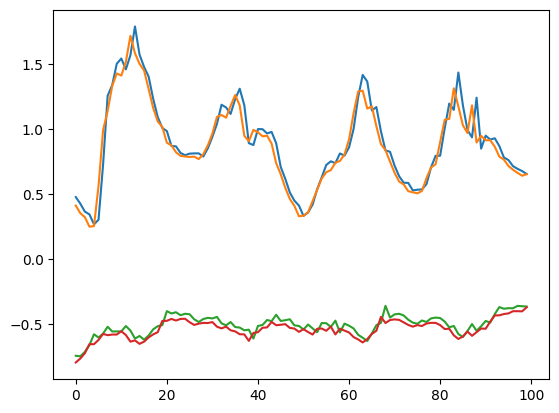

In [148]:
plot_predictions2(model_5, test_dataloader3)

In [158]:
p_training_mean3, p_training_std3, temp_training_mean3, temp_training_std3

(tensor(988.9730), tensor(8.2465), tensor(9.4209), tensor(8.5080))

In [197]:
def preprocess_temp(arr):
    arr = (arr * temp_training_std3.to(device)) + temp_training_mean3.to(device)
    return (arr.cpu().numpy())

def preprocess_p(arr):
    arr = (arr * p_training_std3.to(device)) + p_training_mean3.to(device)
    return (arr.cpu().numpy())

In [198]:
def plot_predictions3(model, dataloader, start=0, end=100):
  model.eval()
  pred_press, pred_temp = [], []
  real_press, real_temp = [], []
  with torch.no_grad():
      for batch_idx, (data, target) in enumerate(tqdm(dataloader, unit='batch')):
          data = data.to(device)
          target = target.to(device)
          
          outputs = model(data)
          for i in range(len(outputs)):
              pred_press.append(preprocess_p((outputs[i][0].item())))
              pred_temp.append(preprocess_temp((outputs[i][1].item())))
              real_press.append(preprocess_p((target[i][0].item())))
              real_temp.append(preprocess_temp((target[i][1].item())))
  df = pd.DataFrame(data={'Temperature Predictions': pred_temp,
                          'Temperature Actuals': real_temp,
                          'Pressure Predictions': pred_press,
                          'Pressure Actuals': real_press})
  plt.plot(df['Temperature Predictions'][start:end])
  plt.plot(df['Temperature Actuals'][start:end])
  plt.plot(df['Pressure Predictions'][start:end])
  plt.plot(df['Pressure Actuals'][start:end])
  return df[start:end]

  0%|          | 0/5084 [00:00<?, ?batch/s]

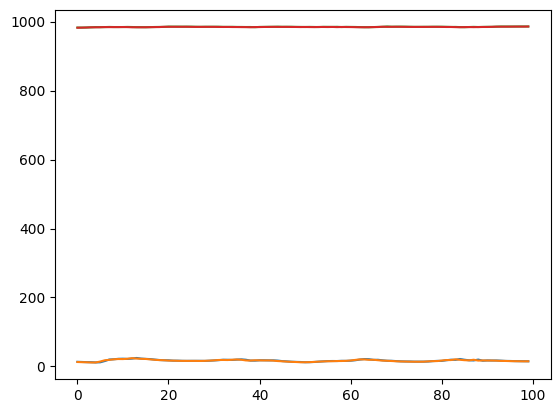

In [199]:
post_processed_df = plot_predictions3(model_5, test_dataloader3)

In [200]:
post_processed_df

,Temperature Predictions,Temperature Actuals,Pressure Predictions,Pressure Actuals
0,13.486431,12.93,982.855,982.43
1,13.055102,12.43,982.8196,982.68
2,12.533608,12.17,983.1038,983.02
3,12.355943,11.55,983.531,983.59
4,11.702951,11.59,984.21875,983.59
...,...,...,...,...
95,15.90554,15.52,985.87103,985.54
96,15.505837,15.27,985.8668,985.68
97,15.330724,15.07,986.0164,985.68
98,15.186308,14.88,985.99493,985.67


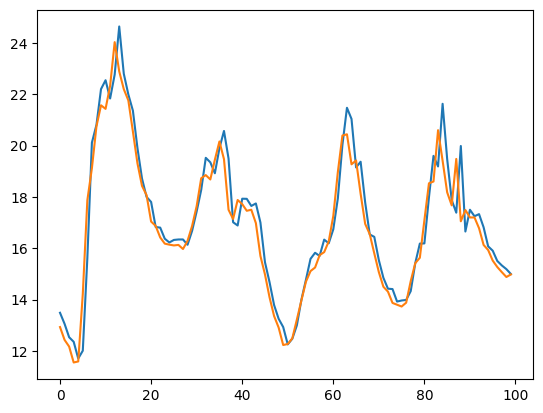

In [201]:
start, end = 0, 100
plt.plot(post_processed_df['Temperature Predictions'][start:end])
plt.plot(post_processed_df['Temperature Actuals'][start:end])

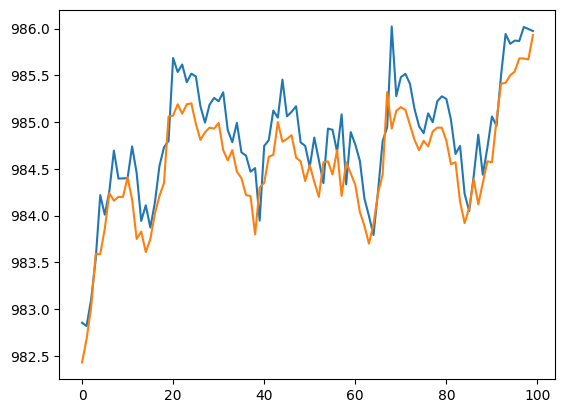

In [202]:
plt.plot(post_processed_df['Pressure Predictions'][start:end])
plt.plot(post_processed_df['Pressure Actuals'][start:end])